# IMPORTACION DE DATOS

In [48]:
import pandas as pd #Manipulación de datos
import os #Manejo de Archivos Drive

In [49]:
import sys

if 'google.colab' in sys.modules:
  from google.colab import drive
  drive.mount('/content/drive')
  dir = '/content/drive/MyDrive/ESIS_2024/7mo_semestre/Analitica_Datos/UNID02/TrabajoUnidad02/Data/bank'
else:
  dir = './Data/bank/'
  
os.listdir(dir)

['bank-full.csv',
 'bank-names.txt',
 'bank.csv',
 'bank-full-trad.xlsx',
 'bank-full.xlsx',
 'bank-full-trad-num.xlsx']

In [50]:
archivo = f'{dir}bank-full.xlsx'
data_xls = pd.read_excel(archivo, sheet_name='bank-full')

In [51]:
data_xls.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# PREPARACIÓN DE DATA

In [52]:
data_xls.head()
# Copiar el dataframe
df_clean = data_xls.copy()
df_clean


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### a. Identificacion de categorias de columnas

In [53]:
print( 'Job: ',  df_clean['job'].unique())
print( 'Marital: ', df_clean['marital'].unique())
print( 'Education: ' , df_clean['education'].unique())
print( 'Default: ' , df_clean['default'].unique())
print( 'Housing: ' , df_clean['housing'].unique())
print( 'Loan: ' , df_clean['loan'].unique())
print( 'Contact: ' , df_clean['contact'].unique())
print( 'Month: ' , df_clean['month'].unique())
print( 'PoutCome: ' , df_clean['poutcome'].unique())
print( 'Y: ' , df_clean['y'].unique())

Job:  ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Marital:  ['married' 'single' 'divorced']
Education:  ['tertiary' 'secondary' 'unknown' 'primary']
Default:  ['no' 'yes']
Housing:  ['yes' 'no']
Loan:  ['no' 'yes']
Contact:  ['unknown' 'cellular' 'telephone']
Month:  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
PoutCome:  ['unknown' 'failure' 'other' 'success']
Y:  ['no' 'yes']


> REEMPLAZO DE DICOTOMICOS POR 0 Y 1

In [54]:
df_clean['y'] = [ 0 if x == 'no' else 1 for x in df_clean['y'] ]
df_clean['default'] = [ 0 if x == 'no' else 1 for x in df_clean['default'] ]
df_clean['housing'] = [ 0 if x == 'no' else 1 for x in df_clean['housing'] ]
df_clean['loan'] = [ 0 if x == 'no' else 1 for x in df_clean['loan'] ]
df_clean.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


> GENERACIO NDE DUMMIES PARA COLUMNAS CATEGORICAS

In [55]:
columnasParaDummies = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
dummies = pd.get_dummies(df_clean[columnasParaDummies])

In [56]:
# Cmprobacion de nuevas columnas creadas por dummies
columnaImprimir = 'contact'

# Filtrar las columnas que empiezan con una columna específica
columnas_job = [col for col in dummies.columns if col.startswith(columnaImprimir)]
# Imprimir las columnas filtradas
print(f"Columnas que empiezan con {columnaImprimir}:\n {columnas_job} \n")
# Mostrar las primeras filas de las columnas filtradas
print(dummies[columnas_job].head())


Columnas que empiezan con contact:
 ['contact_cellular', 'contact_telephone', 'contact_unknown'] 

   contact_cellular  contact_telephone  contact_unknown
0             False              False             True
1             False              False             True
2             False              False             True
3             False              False             True
4             False              False             True


> Eliminacion de columnas que no son dummies

In [57]:
df_clean = df_clean.drop(columns=columnasParaDummies)

In [58]:
# Fusionamos el dataframe original con las columnas dummies
df_clean = pd.concat([df_clean, dummies], axis=1)

In [59]:
df_clean['y'].value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

### b. Escalamos los rangos

Cuando utilizas SMOTE (Synthetic Minority Over-sampling Technique) para balancear clases en un conjunto de datos desbalanceado, es una buena práctica escalar nuestros datos antes de aplicar SMOTE. La razón principal para esto es que SMOTE genera ejemplos sintéticos al interpolar entre ejemplos existentes, y las características deben estar en la misma escala para que estas interpolaciones sean efectivas.

Usaremos MinMaxScaler de scikit-learn para escalar columnas que tengan valores superiores a 1 en el rango [0, 1]. Aqui cómo:

Para normalizar un valor $X$ al rango $[0, 1]$, utilizamos la fórmula:

$$
X_{\text{norm}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$

donde:
- $X$ es el valor original.
- $X_{\text{min}}$ es el valor mínimo en el rango original.
- $X_{\text{max}}$ es el valor máximo en el rango original.
- $X_{\text{norm}}$ es el valor normalizado.


In [60]:
from sklearn.preprocessing import MinMaxScaler

# Selecciona las columnas que tienen valores mayores a 1
to_scale = [col for col in df_clean.columns if df_clean[col].max() > 1] 

mms = MinMaxScaler() # Se crea el objeto MinMaxScaler
df_clean[to_scale] = mms.fit_transform(df_clean[to_scale]) # Se escalan las columnas seleccionadas
df_clean

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.519481,0,0.092259,1,0,0.133333,0.053070,0.000000,0.000000,0.000000,...,False,False,True,False,False,False,False,False,False,True
1,0.337662,0,0.073067,1,0,0.133333,0.030704,0.000000,0.000000,0.000000,...,False,False,True,False,False,False,False,False,False,True
2,0.194805,0,0.072822,1,1,0.133333,0.015453,0.000000,0.000000,0.000000,...,False,False,True,False,False,False,False,False,False,True
3,0.376623,0,0.086476,1,0,0.133333,0.018707,0.000000,0.000000,0.000000,...,False,False,True,False,False,False,False,False,False,True
4,0.194805,0,0.072812,0,0,0.133333,0.040260,0.000000,0.000000,0.000000,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,0,0.080293,0,0,0.533333,0.198658,0.032258,0.000000,0.000000,...,False,False,False,True,False,False,False,False,False,True
45207,0.688312,0,0.088501,0,0,0.533333,0.092721,0.016129,0.000000,0.000000,...,False,False,False,True,False,False,False,False,False,True
45208,0.701299,0,0.124689,0,0,0.533333,0.229158,0.064516,0.212156,0.010909,...,False,False,False,True,False,False,False,False,True,False
45209,0.506494,0,0.078868,0,0,0.533333,0.103294,0.048387,0.000000,0.000000,...,False,False,False,True,False,False,False,False,False,True


# ÁRBOL DE DECISION DIRECTO

## a. Seleccionamos las variables

In [64]:
covariables = df_clean.drop(columns=['y'])
objetivo = df_clean['y']

## b. Entrenamiento del Árbol de decisión

In [65]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X=covariables, y=objetivo)

DecisionTreeClassifier(max_depth=4, random_state=42)

## c. Visualizar Módelo

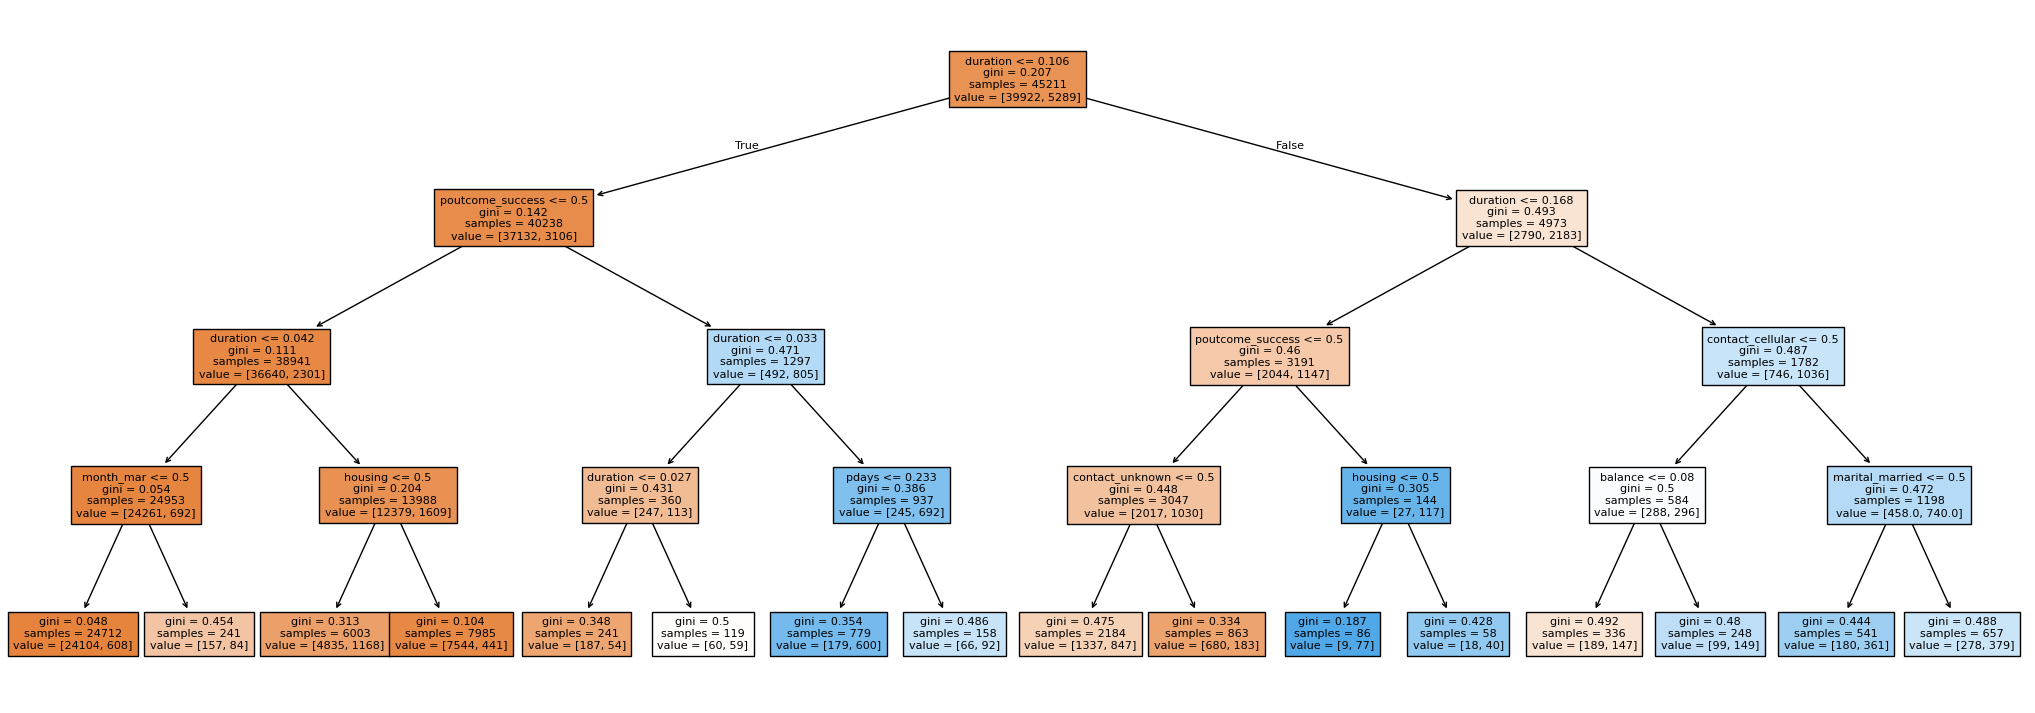

In [66]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(26, 9))
plot_tree(decision_tree=model, feature_names=covariables.columns, filled=True, fontsize=8);


## d. Evaluación de prediccion

In [67]:
y_pred = model.predict(covariables)
df_predic = pd.DataFrame({'y': objetivo, 'y_pred': y_pred})

In [70]:
df_predic.sample(10)[['y','y_pred']]

,y,y_pred
43894,1,0
18618,0,0
33905,0,0
41955,1,0
6661,0,0
30961,0,0
39437,0,0
12070,0,0
24030,0,0
28972,0,0


In [71]:
precision = (df_predic['y'] == df_predic['y_pred']).mean()
cantidad_error = (df_predic['y'] != df_predic['y_pred']).sum() 

print(f'Precisión: {precision:.5f}')
print(f'Cantidad de errores: {cantidad_error}')

Precisión: 0.90224
Cantidad de errores: 4420


# ÁRBOL DE DECISIÓN CON `SMOTE`

## a. APLICACIÓN DE SMOTE

In [72]:
# Separamos covariables de variable objetivo
covariables = df_clean.drop(columns=['y'])
objetivo = df_clean['y']

In [ ]:
# pip install imbalanced-learn

In [73]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority')
# sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(covariables, objetivo)

print(f'''Shape of X before SMOTE: {covariables.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100


Shape of X before SMOTE: (45211, 48)
Shape of X after SMOTE: (79844, 48)

Balance of positive and negative classes (%):


y
0    50.0
1    50.0
Name: proportion, dtype: float64

> Comparacion de Datos `y` sin smote y con smote

In [74]:
print ( f'y antes de SMOTE: {objetivo.value_counts()}')
print ( f'y después de SMOTE: {y_sm.value_counts()}')

y antes de SMOTE: y
0    39922
1     5289
Name: count, dtype: int64
y después de SMOTE: y
0    39922
1    39922
Name: count, dtype: int64


## b. ENTRENAMIENTO DE ÁRBOL CON `SMOTE`

In [75]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X=X_sm, y=y_sm)

DecisionTreeClassifier(max_depth=4, random_state=42)

## c. Visualizar Módelo

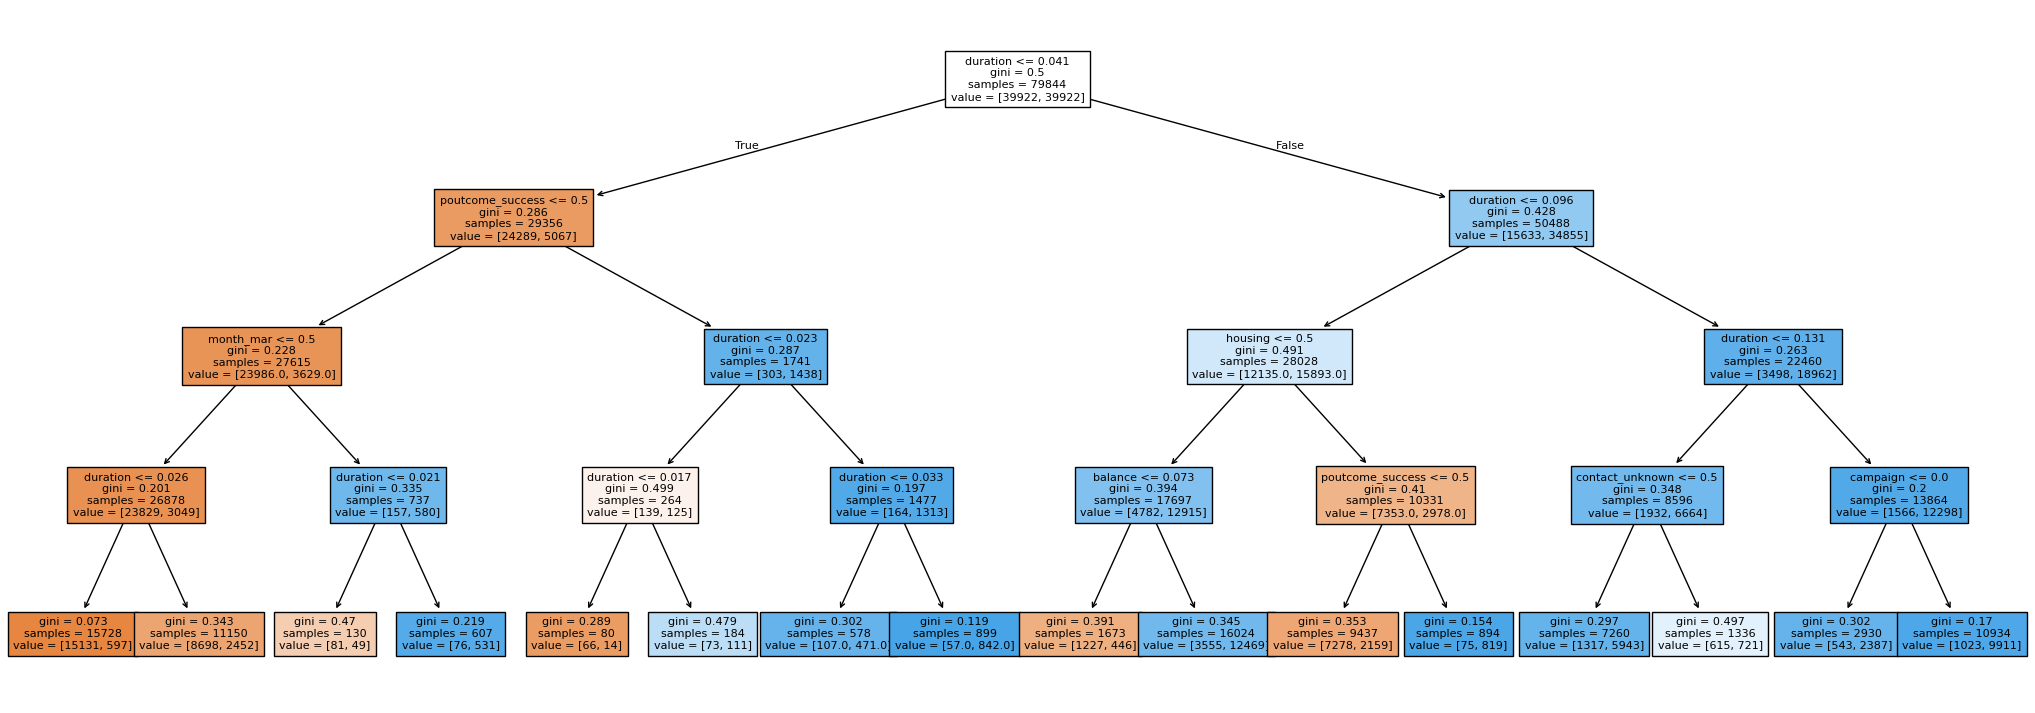

In [76]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(26, 9))
plot_tree(decision_tree=model, feature_names=X_sm.columns, filled=True, fontsize=8);


## d. Evaluación de prediccion

In [78]:
y_pred_sm = model.predict(X_sm)
df_predic_sm = pd.DataFrame({'y_sm': y_sm, 'y_pred_sm': y_pred_sm})

In [79]:
df_predic_sm.sample(10)

,y_sm,y_pred_sm
38305,0,0
54736,1,1
20957,0,0
25,0,0
30521,0,0
45740,1,1
75645,1,1
33469,0,0
71446,1,1
71704,1,1


In [83]:
precision_sm = (df_predic_sm['y_sm'] == df_predic_sm['y_pred_sm']).mean()
cantidad_error_sm = (df_predic_sm['y_sm'] != df_predic_sm['y_pred_sm']).sum() 

print(f'Precisión: {precision_sm*100:.2f}%')
print(f'Cantidad de errores: {cantidad_error_sm}')

Precisión: 83.52%
Cantidad de errores: 13158


In [85]:
# Comparar la precisión de los modelos
print(f'Precisión del modelo sin SMOTE: {precision*100:.2f}%')
print(f'Precisión del modelo con SMOTE: {precision_sm*100:.2f}%')


Precisión del modelo sin SMOTE: 90.22%
Precisión del modelo con SMOTE: 83.52%


***EL MODELO BAJA SU PRECISION CON LA GENERACION DE DATOS SINTETICOS MEDIANTE SMOTE***